In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv(r"D:\Documents\Coding\Python\Files\wheat-seeds.csv")

data.head(10)


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [31]:
data.tail(10)


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
200,12.38,13.44,0.86,5.22,2.99,5.47,5.04,3
201,12.67,13.32,0.90,4.98,3.13,2.30,4.75,3
202,11.18,12.72,0.87,5.01,2.81,4.05,4.83,3
203,12.70,13.41,0.89,5.18,3.09,8.46,5.00,3
204,12.37,13.47,0.86,5.20,2.96,3.92,5.00,3
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87,3
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00,3
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06,3
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04,3
209,12.30,13.34,0.87,5.24,2.97,5.64,5.06,3


In [34]:
data[50:60]


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
50,14.43,14.40,0.88,5.58,3.27,3.98,5.14,1
51,15.78,14.91,0.89,5.67,3.43,5.59,5.14,1
52,14.49,14.61,0.85,5.71,3.11,4.12,5.40,1
53,14.33,14.28,0.88,5.50,3.20,3.33,5.22,1
54,14.52,14.60,0.86,5.74,3.11,1.48,5.49,1
55,15.03,14.77,0.87,5.70,3.21,1.93,5.44,1
56,14.46,14.35,0.88,5.39,3.38,2.80,5.04,1
57,14.92,14.43,0.90,5.38,3.41,1.14,5.09,1
58,15.38,14.77,0.89,5.66,3.42,2.00,5.22,1
59,12.11,13.47,0.84,5.16,3.03,1.50,4.52,1


In [38]:
data.loc[100:115, ["Area", "Perimeter", "Type"]]


,Area,Perimeter,Type
100,16.41,15.25,2
101,17.99,15.86,2
102,19.46,16.50,2
103,19.18,16.63,2
104,18.95,16.42,2
105,18.83,16.29,2
106,18.85,16.17,2
107,17.63,15.86,2
108,19.94,16.92,2
109,18.55,16.22,2


In [42]:
data["Type"].unique()


array([1, 2, 3])

In [43]:
data["Area"].unique()


array([15.26, 14.88, 14.29, 13.84, 16.14, 14.38, 14.69, 14.11, 16.63,
       16.44, 14.03, 13.89, 13.78, 13.74, 14.59, 13.99, 15.69, 14.7 ,
       12.72, 14.16, 15.88, 12.08, 15.01, 16.19, 13.02, 12.74, 13.45,
       13.16, 15.49, 14.09, 13.94, 15.05, 16.12, 16.2 , 17.08, 14.8 ,
       14.28, 13.54, 13.5 , 15.5 , 15.11, 13.8 , 15.36, 14.99, 14.79,
       14.86, 14.43, 15.78, 14.49, 14.33, 14.52, 15.03, 14.46, 14.92,
       15.38, 12.11, 11.42, 11.23, 12.36, 13.22, 12.78, 12.88, 14.34,
       14.01, 14.37, 12.73, 17.63, 16.84, 17.26, 19.11, 16.82, 16.77,
       17.32, 20.71, 18.94, 17.12, 16.53, 18.72, 20.2 , 19.57, 19.51,
       18.27, 18.88, 18.98, 21.18, 20.88, 20.1 , 18.76, 18.81, 18.59,
       18.36, 16.87, 19.31, 18.17, 16.41, 17.99, 19.46, 19.18, 18.95,
       18.83, 18.85, 19.94, 18.55, 18.45, 19.38, 19.13, 19.14, 20.97,
       19.06, 18.96, 19.15, 18.89, 20.03, 20.24, 18.14, 16.17, 18.43,
       15.99, 18.75, 18.65, 17.98, 20.16, 17.55, 18.3 , 16.16, 15.56,
       17.36, 15.57,

In [6]:
print(f"Shape of the dataset: {data.shape}")


Shape of the dataset: (210, 8)


In [7]:
data.describe()


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [8]:
data.columns


Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [10]:
print(f"Maximum Area: {data['Area'].max()}")
print(f"Minimum Area: {data['Area'].min()}")


Maximum Area: 21.18
Minimum Area: 10.59


In [11]:
data.isnull().sum()


Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Calculate the mean for all columns 
mean_values = data.mean(numeric_only=True)
print("Mean values for each column:\n")
print(mean_values)


Mean values for each column:

Area              14.85
Perimeter         14.56
Compactness        0.87
Kernel.Length      5.63
Kernel.Width       3.26
Asymmetry.Coeff    3.70
Kernel.Groove      5.41
Type               2.00
dtype: float64


In [13]:
# Calculate the median for all columns
median_values = data.median(numeric_only=True)
print("Median values for each column:\n")

print(median_values)


Median values for each column:

Area              14.36
Perimeter         14.32
Compactness        0.87
Kernel.Length      5.52
Kernel.Width       3.24
Asymmetry.Coeff    3.60
Kernel.Groove      5.22
Type               2.00
dtype: float64


In [22]:
corr_data = data.corr()
print(corr_data)


                 Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
Area             1.00       0.99         0.61           0.95          0.97   
Perimeter        0.99       1.00         0.53           0.97          0.94   
Compactness      0.61       0.53         1.00           0.37          0.76   
Kernel.Length    0.95       0.97         0.37           1.00          0.86   
Kernel.Width     0.97       0.94         0.76           0.86          1.00   
Asymmetry.Coeff -0.23      -0.22        -0.33          -0.17         -0.26   
Kernel.Groove    0.86       0.89         0.23           0.93          0.75   
Type            -0.35      -0.33        -0.53          -0.26         -0.42   

                 Asymmetry.Coeff  Kernel.Groove  Type  
Area                       -0.23           0.86 -0.35  
Perimeter                  -0.22           0.89 -0.33  
Compactness                -0.33           0.23 -0.53  
Kernel.Length              -0.17           0.93 -0.26  
Kernel.Width     

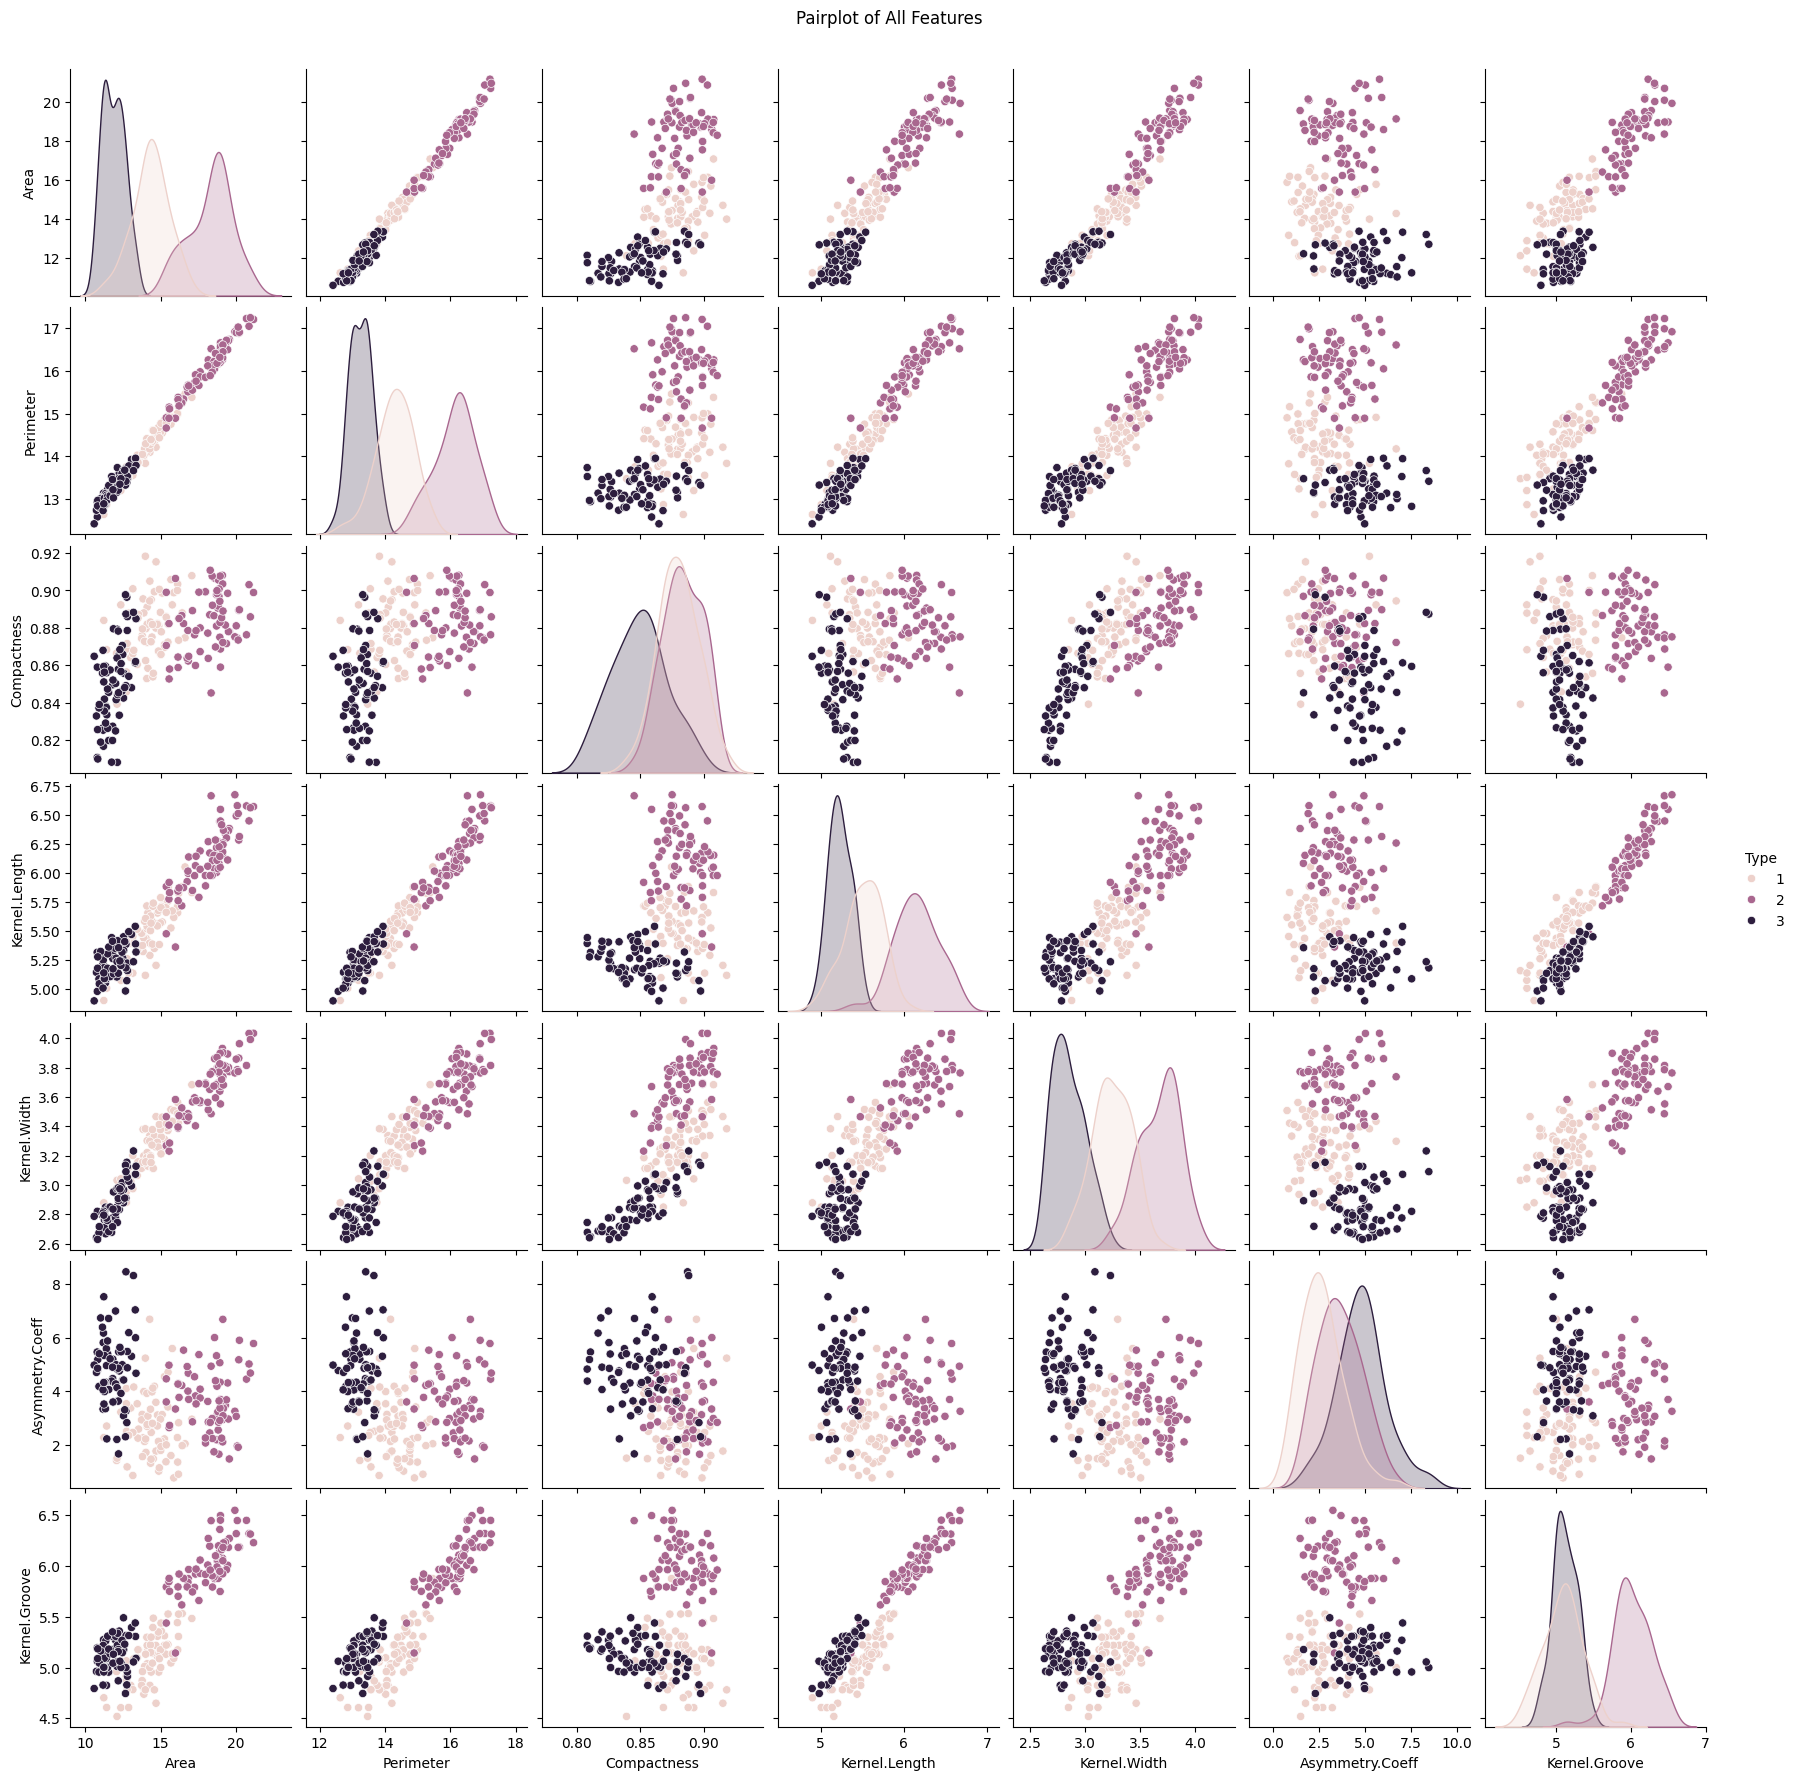

In [18]:
# Pairplot
sns.pairplot(data, hue='Type')
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()


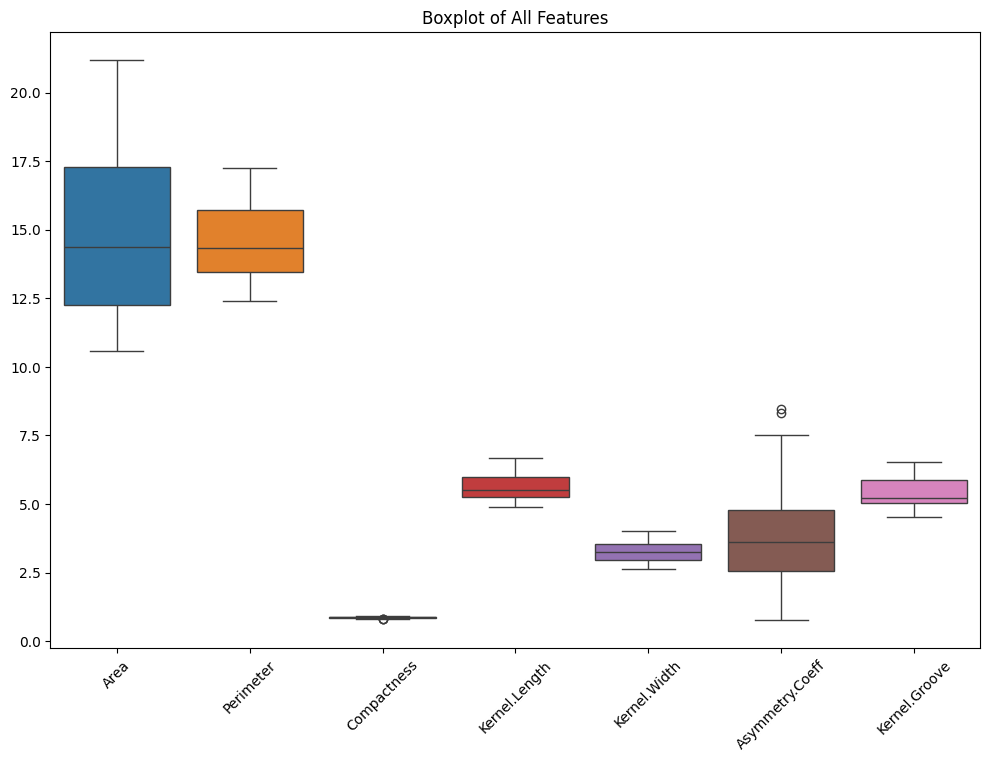

In [20]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns=['Type']))
plt.title('Boxplot of All Features')
plt.xticks(rotation=45)
plt.show()


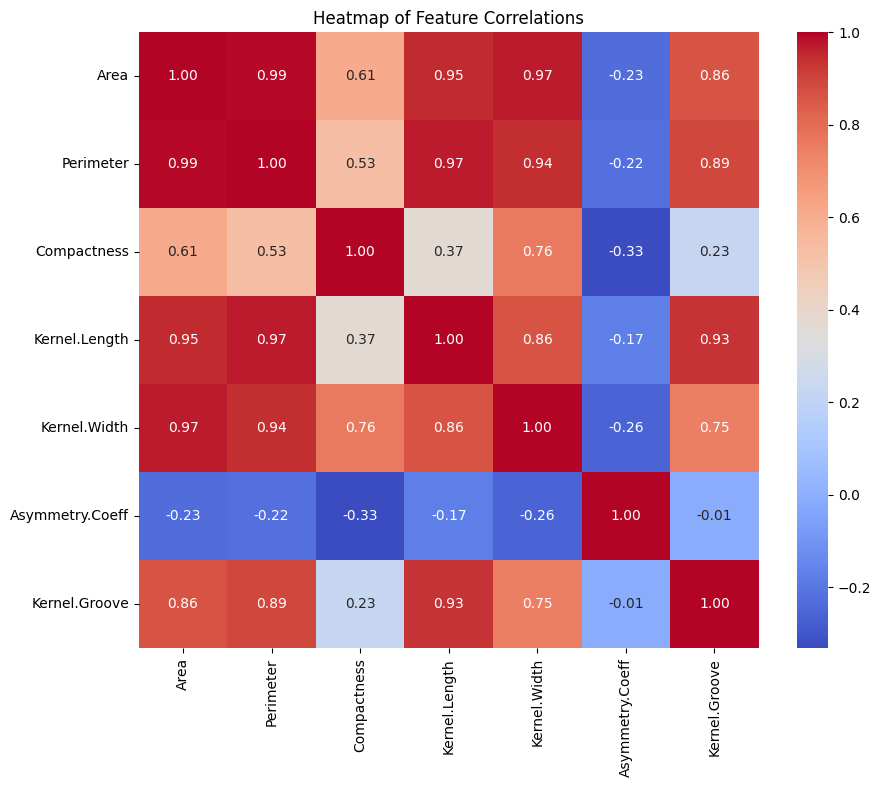

In [21]:
# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.drop(columns=['Type']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()


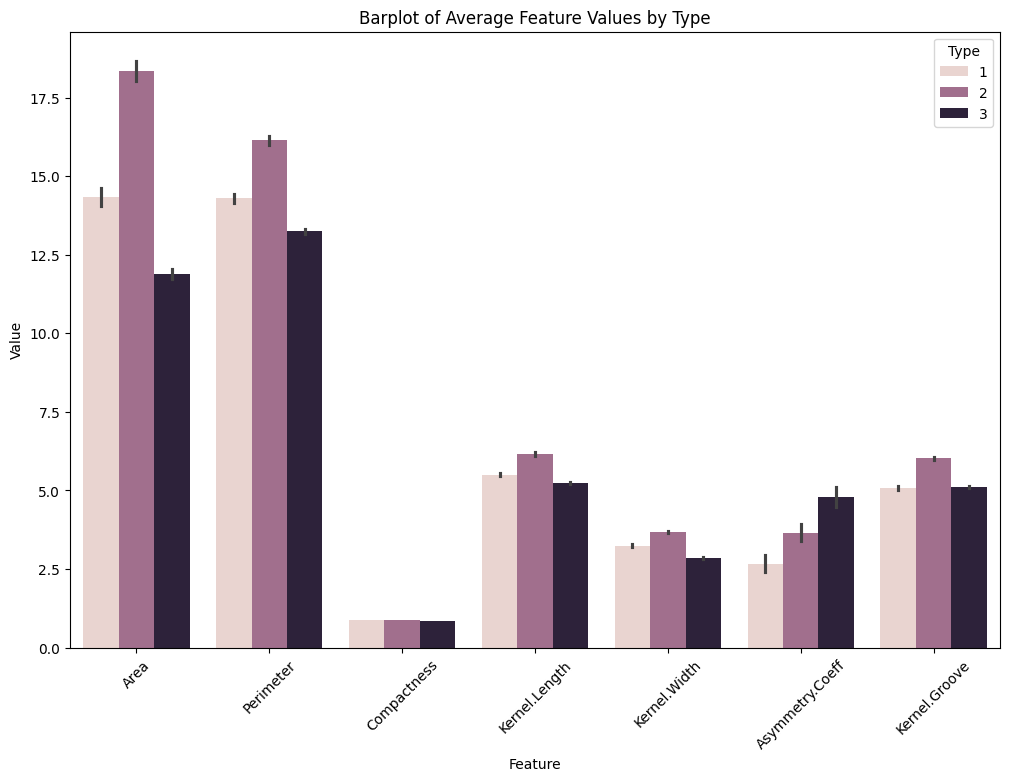

In [25]:
plt.figure(figsize=(12, 8))
data_melted = data.melt(id_vars='Type', var_name='Feature', value_name='Value')
sns.barplot(x='Feature', y='Value', hue='Type', data=data_melted)
plt.title('Barplot of Average Feature Values by Type')
plt.xticks(rotation=45)
plt.show()


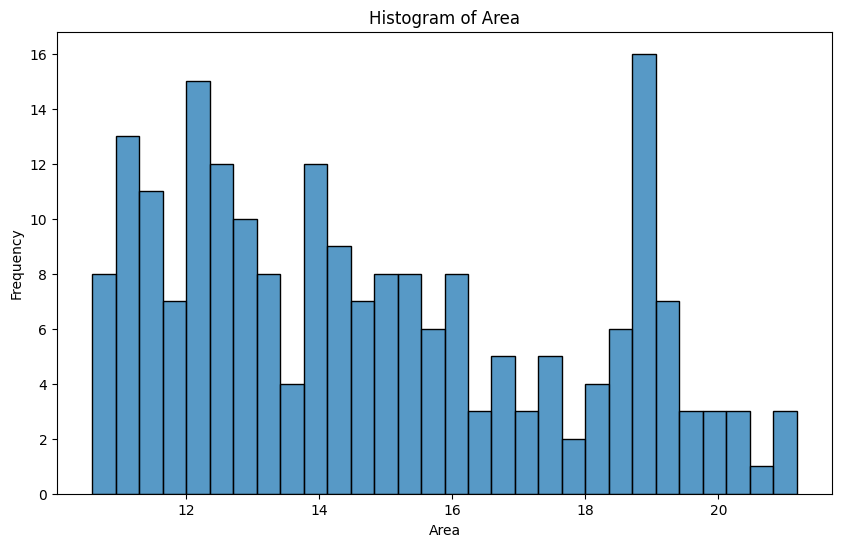

In [26]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Area'], bins=30, kde=False)
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

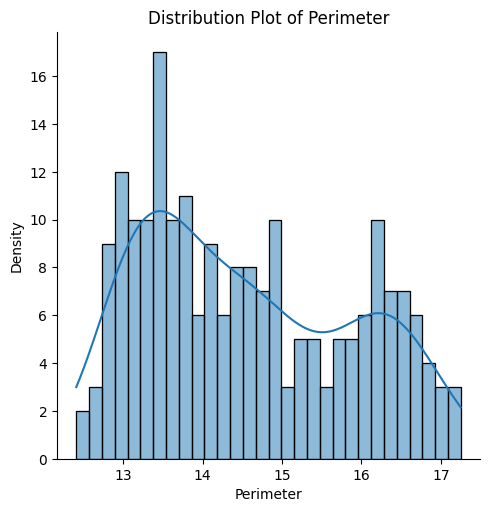

In [28]:
# Distribution Plot 
plt.figure(figsize=(10, 6))
sns.displot(data['Perimeter'], bins=30, kde=True)
plt.title('Distribution Plot of Perimeter')
plt.xlabel('Perimeter')
plt.ylabel('Density')
plt.show()


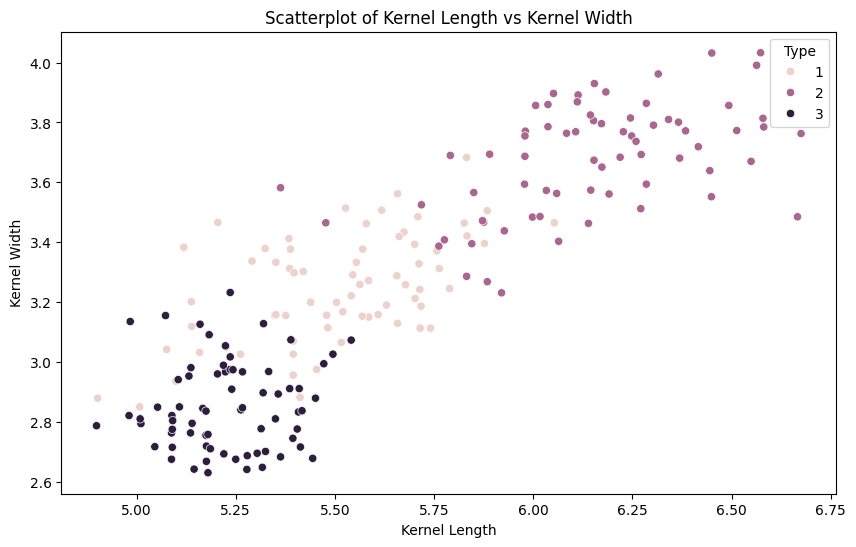

In [30]:
# Scatterplot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kernel.Length', y='Kernel.Width', hue='Type', data=data)
plt.title('Scatterplot of Kernel Length vs Kernel Width')
plt.xlabel('Kernel Length')
plt.ylabel('Kernel Width')
plt.show()
